In [179]:
import numpy as np
import math
import io
import pandas as pd


In [180]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [182]:
pop=pd.read_csv('grades.csv')

In [183]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


In [184]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
grade    100 non-null float64
dtypes: float64(1)
memory usage: 928.0 bytes


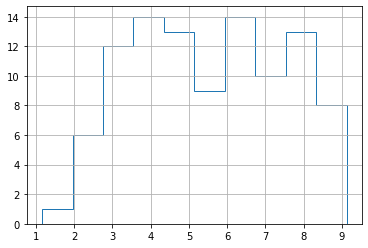

In [185]:
pop.grade.hist(histtype='step')

In [186]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [187]:
pop.sample(100,replace=True).describe()

,grade
count,100.000000
mean,5.433348
std,1.985270
min,1.160899
25%,3.648651
50%,5.574681
75%,7.213460
max,8.888042


In [188]:
bootstrap= pd.DataFrame({'meangrade': [pop.sample(100,replace=True).grade.mean()
                        for i in range(1000)]})

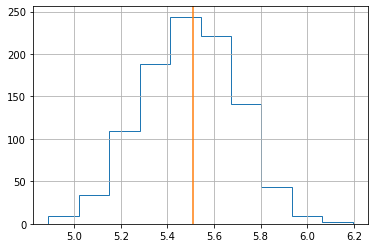

In [189]:
bootstrap.meangrade.hist(histtype='step')
plt.axvline(pop.grade.mean(),color='C1')

In [190]:
bootstrap.meangrade.quantile(0.025),bootstrap.meangrade.quantile(0.975)

(5.097831260509098, 5.8710049260920085)

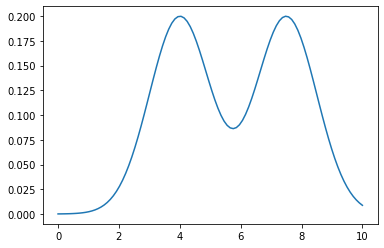

In [191]:
n1=scipy.stats.norm(7.5,1)
n2=scipy.stats.norm(4,1)

x= np.linspace(0,10,100)
plt.plot(x,0.5*n1.pdf(x)+0.5*n2.pdf(x))

In [192]:
def draw():
    while True:
        v=n1.rvs() if np.random.rand()>0.5 else n2.rvs()
        if 0<=v<=10:
            return v

In [193]:
def dataset(n=100):
    return pd.DataFrame({'grade':[draw() for i in range(n)]})

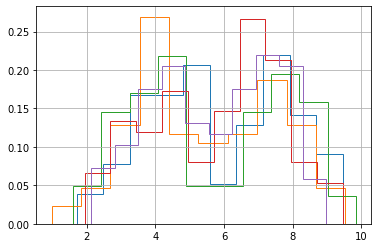

In [194]:
for i in range(5):
    dataset(100).grade.hist(histtype='step',density=True)

In [195]:
means=pd.DataFrame({'meangrade':[dataset(100).grade.mean() 
                                 for i in range(1000)]})

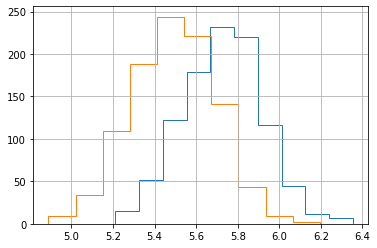

In [196]:
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')